# Predicting car price using machcine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting car price.


We're going to take following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> How we can we predict the future sale price of car?

If one ignores the brand of the car, a car manufacturer primarily fixes the price of a car based on the features it can offer a customer. Later, the brand may raise the price depending on its goodwill, but the most important factors are what features a car gives you to add value to your life.

## 2. Data

The dataset I’m using here to train a car price prediction model was downloaded from Kaggle.

## 3. Evaluation


## 4. Features


## Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [48]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Model Evaluations
from sklearn.metrics import mean_absolute_error

## Load data

In [49]:
df = pd.read_csv("data/car-price.csv")

df.shape 
# (rows, columns)

(205, 26)

## Data Exploration (exploratory data analysis or EDA)

In [50]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
car_ID,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
symboling,3,3,1,2,2,2,1,1,1,0,2,0,0,0,1,0,0,0,2,1
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls,audi fox,audi 100ls,audi 5000,audi 4000,audi 5000s (diesel),bmw 320i,bmw 320i,bmw x1,bmw x3,bmw z4,bmw x4,bmw x5,bmw x3,chevrolet impala,chevrolet monte carlo
fueltype,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std,std,std,std,turbo,turbo,std,std,std,std,std,std,std,std,std,std
doornumber,two,two,two,four,four,two,four,four,four,two,two,four,two,four,four,four,two,four,two,two
carbody,convertible,convertible,hatchback,sedan,sedan,sedan,sedan,wagon,sedan,hatchback,sedan,sedan,sedan,sedan,sedan,sedan,sedan,sedan,hatchback,hatchback
drivewheel,rwd,rwd,rwd,fwd,4wd,fwd,fwd,fwd,fwd,4wd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,rwd,fwd,fwd
enginelocation,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4,99.8,105.8,105.8,105.8,99.5,101.2,101.2,101.2,101.2,103.5,103.5,103.5,110.0,88.4,94.5


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There are 26 columns in this dataset, so it is very important to check whether or not this dataset contains null vales before goint any futher:

In [52]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Now Let look at how many different cars are there in the dataset

In [53]:
# Convert the 'CarName' column to a pandas Series
car_names_series = pd.Series(df.CarName)

# Count the frequency of each unique car name
unique_car_names_count = car_names_series.value_counts().sum()

# Couting how unique car are there in dataset
unique_car_names_count

205

The price column in this dataset is supposed to be the column whose values we need to predict. So let’s see the distribution of the values of the price column:

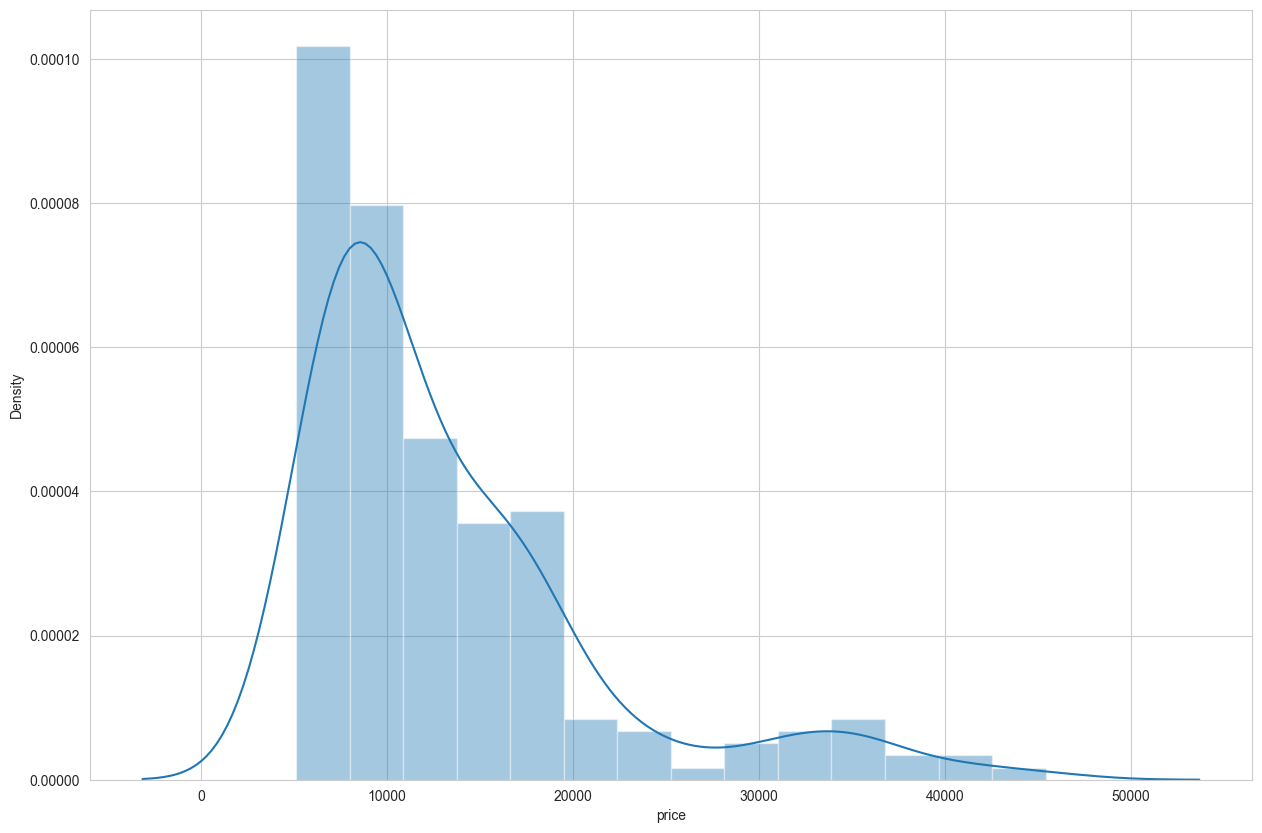

In [54]:
import warnings

# Ignore the warning for the specific cell
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(df.price)
plt.show()

# Reset the warning filter to its default behavior
warnings.resetwarnings()

In [55]:
df.head().T

,0,1,2,3,4
car_ID,1,2,3,4,5
symboling,3,3,1,2,2
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumber,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


In [56]:
pd.api.types.is_string_dtype(df["carbody"])

True

In [57]:
# Find the columns which contains strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
cylindernumber
fuelsystem


In [58]:
# This will turn all the string value into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   car_ID            205 non-null    int64   
 1   symboling         205 non-null    int64   
 2   CarName           205 non-null    category
 3   fueltype          205 non-null    category
 4   aspiration        205 non-null    category
 5   doornumber        205 non-null    category
 6   carbody           205 non-null    category
 7   drivewheel        205 non-null    category
 8   enginelocation    205 non-null    category
 9   wheelbase         205 non-null    float64 
 10  carlength         205 non-null    float64 
 11  carwidth          205 non-null    float64 
 12  carheight         205 non-null    float64 
 13  curbweight        205 non-null    int64   
 14  enginetype        205 non-null    category
 15  cylindernumber    205 non-null    category
 16  enginesize        205 non-

In [60]:
df.fuelsystem.cat.categories

Index(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'], dtype='object')

In [61]:
df.fuelsystem.cat.codes

0      5
1      5
2      5
3      5
4      5
      ..
200    5
201    5
202    5
203    3
204    5
Length: 205, dtype: int8

### Save preprocessed data

In [62]:
# Export current tmp dataframe
df.to_csv("data/train_tmp.csv", index=False)

In [63]:
# Import preprocessed data
df_tmp = pd.read_csv("data/train_tmp.csv", low_memory=False)
df_tmp.head().T

,0,1,2,3,4
car_ID,1,2,3,4,5
symboling,3,3,1,2,2
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumber,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


## Filling and turning categorical variables into numbers

In [64]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

CarName
fueltype
aspiration
doornumber
carbody
drivewheel
enginelocation
enginetype
cylindernumber
fuelsystem


In [65]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
#         # Add binary column to indicate whether sample had missing value
#         df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [66]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int16  
 3   fueltype          205 non-null    int8   
 4   aspiration        205 non-null    int8   
 5   doornumber        205 non-null    int8   
 6   carbody           205 non-null    int8   
 7   drivewheel        205 non-null    int8   
 8   enginelocation    205 non-null    int8   
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int8   
 15  cylindernumber    205 non-null    int8   
 16  enginesize        205 non-null    int64  
 1

In [67]:
df_tmp.T

,0,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
car_ID,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.000,...,196.00,197.00,198.00,199.00,200.00,201.00,202.00,203.00,204.00,205.00
symboling,3.00,3.00,1.00,2.00,2.00,2.00,1.00,1.00,1.00,0.000,...,-1.00,-2.00,-1.00,-2.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
CarName,3.00,4.00,2.00,5.00,6.00,10.00,6.00,8.00,7.00,9.000,...,139.00,141.00,142.00,144.00,145.00,140.00,139.00,141.00,143.00,144.00
fueltype,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.000,...,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,2.00
aspiration,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.000,...,1.00,1.00,1.00,2.00,2.00,1.00,2.00,1.00,2.00,2.00
doornumber,2.00,2.00,2.00,1.00,1.00,2.00,1.00,1.00,1.00,2.000,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
carbody,1.00,1.00,3.00,4.00,4.00,4.00,4.00,5.00,4.00,3.000,...,5.00,4.00,5.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00
drivewheel,3.00,3.00,3.00,2.00,1.00,2.00,2.00,2.00,2.00,1.000,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00
enginelocation,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.000,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
wheelbase,88.60,88.60,94.50,99.80,99.40,99.80,105.80,105.80,105.80,99.500,...,104.30,104.30,104.30,104.30,104.30,109.10,109.10,109.10,109.10,109.10


In [68]:
df_tmp.corr()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.967077,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,...,-0.033930,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,0.967077,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,...,-0.153982,0.123845,0.188598,-0.181775,0.101730,-0.092131,-0.138309,0.093437,0.102895,-0.231439
fueltype,-0.125568,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,0.067729,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.190352,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,0.098303,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,0.051406,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.051483,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.129729,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816


(26.5, -0.5)

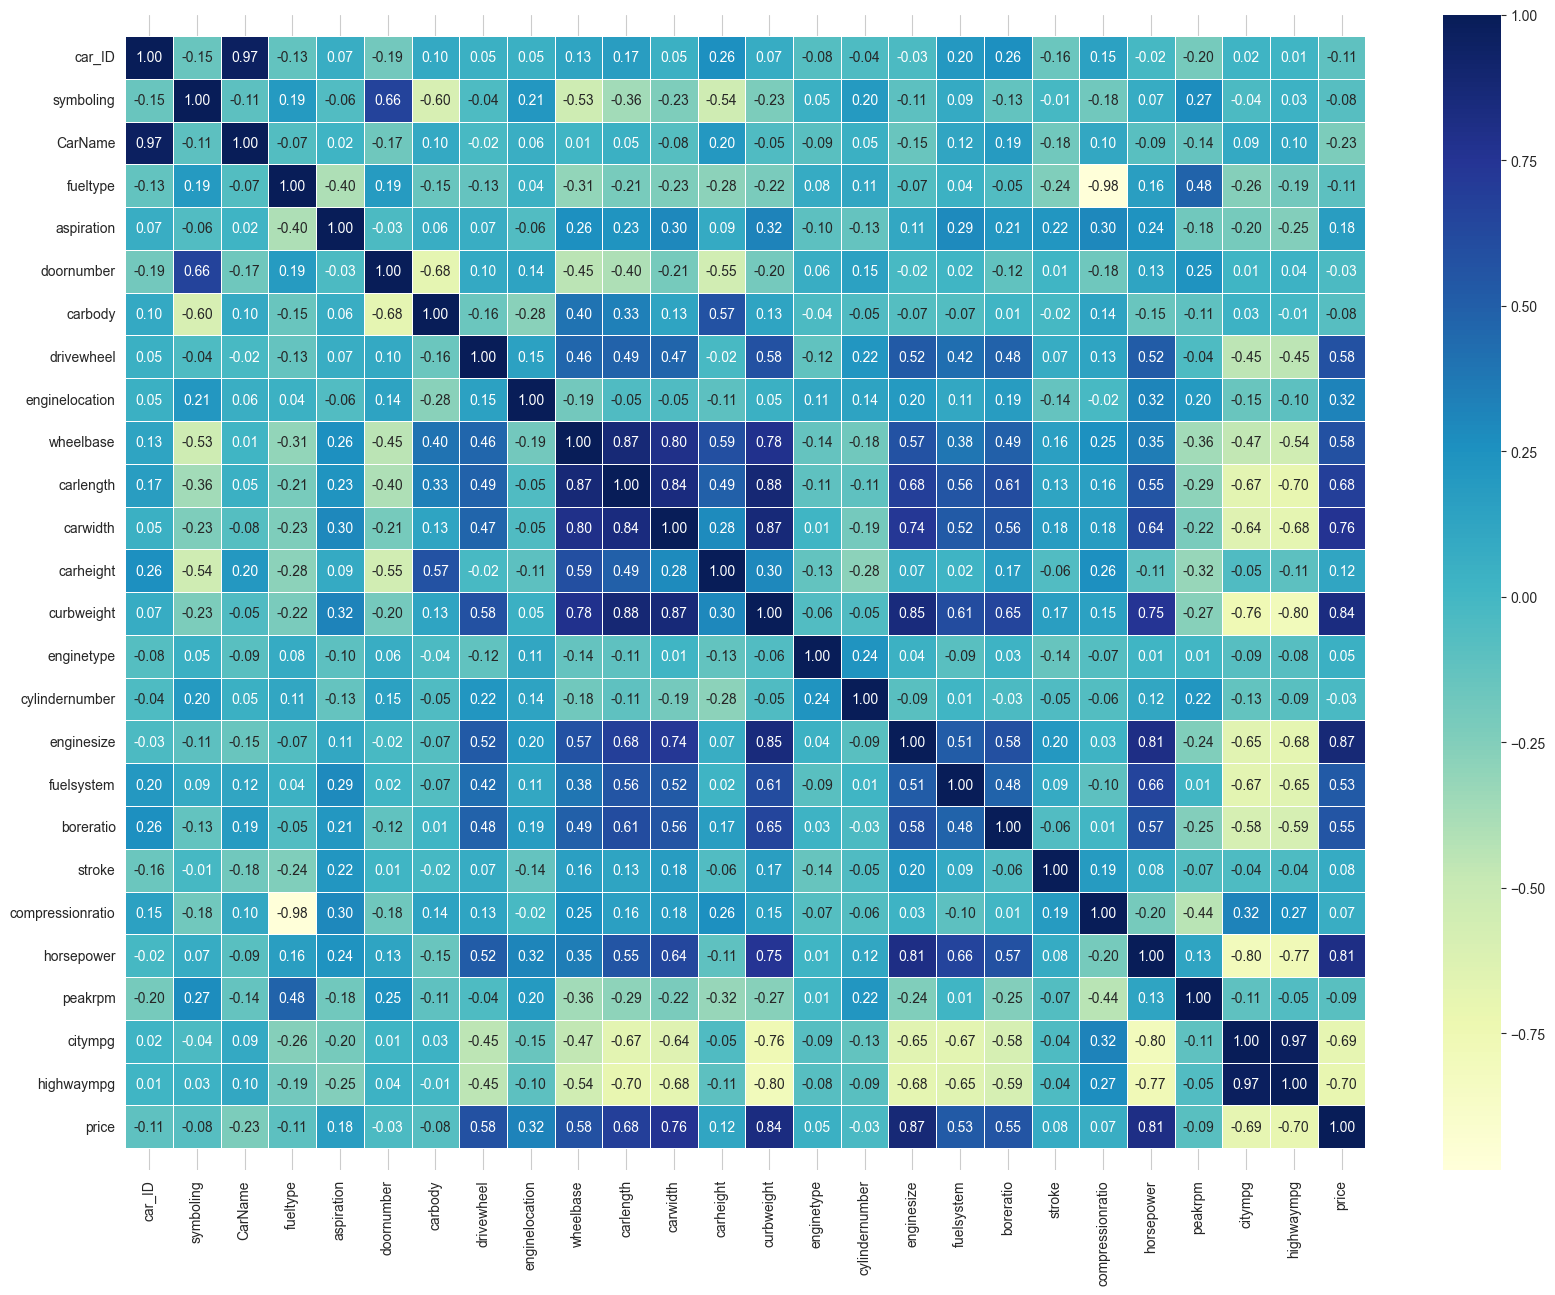

In [75]:
# Let's make our correlation matrix a little prettier
corr_matrix = df_tmp.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Training a Car Price Prediction Model

I will use the decision tree regression algorithm to train a car price prediction model. So let’s split the data into training and test sets and use the decision tree regression algorithm to train the model:

In [81]:
# Split data into X and y
X = df_tmp.drop("price", axis=1)

y = df_tmp["price"]

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [84]:
from sklearn.metrics import mean_absolute_error
model.score(X_test, predictions)

1.0